# くずし字 MNIST データセットの学習
[github](https://github.com/rois-codh/kmnist)からダウンロードしたくずし字データセットを今回作成したニューラルネットワークのクラスneuralNetworkを用いて学習させ、その精度を求めた。

In [1]:
import numpy as np
from neural import neuralNetwork #自作ライブラリ
import matplotlib.pyplot as plt

In [2]:
x_train = np.load('./datasets/kmnist-train-imgs.npz')['arr_0']
t_train = np.load('./datasets/kmnist-train-labels.npz')['arr_0']
x_test = np.load('./datasets/kmnist-test-imgs.npz')['arr_0']
t_test = np.load('./datasets/kmnist-test-labels.npz')['arr_0']

t_train = np.identity(10)[t_train]
t_test = np.identity(10)[t_test]
x_train = x_train.reshape((60000,-1))
x_test = x_test.reshape((10000,-1))

In [3]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
net = neuralNetwork(
    epoch = 33000,
    learning_rate = 0.05,
    batch_size = 500
)
layer_list = [784,[500,80],10]
net.set_layer(layer_list)

<< successfully layers are updated >>


In [ ]:
elapsed_time,train_acc = net.train(x_train,t_train)

--------- epoch0 ---------
loss : 326.1767605428559
accuracy : 0.132
time : 0.05419802665710449 [sec]
--------------------------

--------- epoch100 ---------
loss : 132.98856293781256
accuracy : 0.758
time : 2.463871955871582 [sec]
----------------------------

--------- epoch200 ---------
loss : 111.30737081164841
accuracy : 0.798
time : 4.843092918395996 [sec]
----------------------------

--------- epoch300 ---------
loss : 106.05542960607514
accuracy : 0.796
time : 7.253659963607788 [sec]
----------------------------

--------- epoch400 ---------
loss : 97.56275872930668
accuracy : 0.83
time : 9.858028888702393 [sec]
----------------------------

--------- epoch500 ---------
loss : 88.46469052039552
accuracy : 0.844
time : 12.340934038162231 [sec]
----------------------------

--------- epoch600 ---------
loss : 85.87073632866597
accuracy : 0.834
time : 14.865302085876465 [sec]
----------------------------

--------- epoch700 ---------
loss : 83.58716844087449
accuracy : 0.856
tim

In [16]:
print('train accuracy : {}\ntest accuracy : {}'.format(
    net.accuracy(x_train,t_train),net.accuracy(x_test,t_test)))

train accuracy : 0.9934666666666667
test accuracy : 0.903


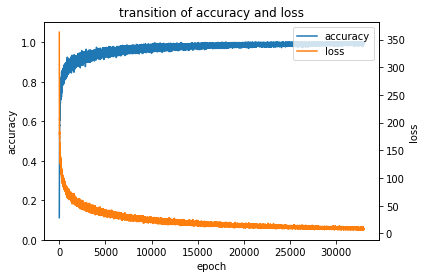

In [7]:
net.visualize()

In [6]:
name = 'train_0.9904,test_0.904'
net.save(name)

In [15]:
name = 'train_0.9904,test_0.904'
net = neuralNetwork.load(name)

successfully network was constructed!


In [36]:
import torch
import torch.nn as nn
import torch.optim as optimizers
from sklearn.utils import shuffle

In [72]:
class MLP(nn.Module):
    def __init__(
        self,
        input_dim,
        hidden_dim_1,
        hidden_dim_2,
        output_dim,
    ):
        super().__init__()
        self.l1 = nn.Linear(input_dim,hidden_dim_1)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(hidden_dim_1,hidden_dim_2)
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear(hidden_dim_2,output_dim)
        self.a3 = nn.Softmax(dim = 1)
        
        
        
        self.layers = [self.l1,self.a1,self.l2,self.a2,self.l3,self.a3]
        
    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
        return x

In [81]:
torch.manual_seed(123)
device = torch.device('cpu')
model = MLP(784,400,50,10).to(device)

criterion = nn.BCELoss()
optimizer = optimizers.Adam(model.parameters(),lr=0.01)

def compute_loss(t,y):
    return criterion(y,t)

def train_step(x,t):
    model.train()
    preds = model(x)
    #print(preds.shape)
    loss = compute_loss(t,preds)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss

epochs = 500
batch_size = 500
n_batches = x_train.shape[0]//batch_size

for epoch in range(epochs):
    train_loss = 0.
    batch = np.random.choice(x_train.shape[0],batch_size)
    x_ = x_train[batch]
    t_ = t_train[batch]
    x_ = torch.Tensor(x_).to(device)
    t_ = torch.Tensor(t_).to(device)
    
    loss = train_step(x_,t_)
    train_loss += loss.item()
    
    if epoch%100 == 0:
        
        print('epoch : {}, loss : {:.3}'.format(
            epoch + 1,
            train_loss
        ))

epoch : 1, loss : 0.326
epoch : 101, loss : 0.0313
epoch : 201, loss : 0.024
epoch : 301, loss : 0.0174
epoch : 401, loss : 0.0159


In [82]:
from sklearn.metrics import accuracy_score

def test_step(x,t):
    x = torch.Tensor(x).to(device)
    t = torch.Tensor(t).to(device)
    model.eval()
    preds = model(x)
    loss = compute_loss(t,preds)
    return loss,preds

test_loss,test_preds = test_step(x_test,t_test)
train_loss,train_preds = test_step(x_train,t_train)
test_loss = test_loss.item()
train_loss = train_loss.item()
test_preds = np.argmax(test_preds.data.cpu().numpy(),axis=1)
train_preds = np.argmax(train_preds.data.cpu().numpy(),axis=1)
test_ans = np.argmax(t_test,axis=1)
test_acc = accuracy_score(test_ans,test_preds)
train_ans = np.argmax(t_train,axis=1)
train_acc = accuracy_score(train_ans,train_preds)

print('train_acc : {:.3f}, test_acc : {:.3f}'.format(
    train_acc,
    test_acc
))

train_acc : 0.979, test_acc : 0.893


In [41]:
np.max(x_train)

1.0

In [71]:
a = np.array([[1,2,3,4,5,6,7,8,9]])
a = torch.Tensor(a).to(device)
l = nn.Softmax(dim = 1)
l(a)

tensor([[2.1208e-04, 5.7649e-04, 1.5671e-03, 4.2597e-03, 1.1579e-02, 3.1475e-02,
         8.5559e-02, 2.3257e-01, 6.3220e-01]])

In [1]:
import torch
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
import torch.optim as optimizers

In [2]:
class Net(nn.Module):
    def __init__(
        self,
        input_dim,
        hidden_dim_1,
        hidden_dim_2,
        output_dim
    ):
        super().__init__()
        self.l1 = nn.Linear(input_dim,hidden_dim_1)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(hidden_dim_1,hidden_dim_2)
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear(hidden_dim_2,output_dim)
        self.a3 = nn.Softmax(dim = 1)
        
        self.layers = [self.l1,self.a1,self.l2,self.a2,self.l3,self.a3]
        
    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
            
        return x

In [3]:
class Dataset:
    def __init__(self,train = True):
        x_train = np.load('./datasets/kmnist-train-imgs.npz')['arr_0']
        t_train = np.load('./datasets/kmnist-train-labels.npz')['arr_0']
        x_test = np.load('./datasets/kmnist-test-imgs.npz')['arr_0']
        t_test = np.load('./datasets/kmnist-test-labels.npz')['arr_0']

        t_train = np.identity(10)[t_train]
        t_test = np.identity(10)[t_test]
        x_train = x_train.reshape((60000,-1)).astype(float)
        x_test = x_test.reshape((10000,-1)).astype(float)
        x_train = x_train/255
        x_test = x_test/255
        if train:
            #self.x = torch.from_numpy(x_train).float
            #self.t = torch.from_numpy(t_train).long
            self.x = x_train
            self.t = t_train
            self.size = x_train.shape[0]
        else:
            #self.x = torch.from_numpy(x_test).float
            #self.t = torch.from_numpy(t_test).long
            self.x = x_test
            self.t = t_test
            self.size = x_test.shape[0]
    def __len__(self):
        return self.size
    
    def __getitem__(self,index):
        return self.x[index],self.t[index]

In [4]:
def load_kuzushijiMNIST(batch_size = 500):
    train_loader = torch.utils.data.DataLoader(
        Dataset(True),
        batch_size = batch_size,
        shuffle = True,
    )
    test_loader = torch.utils.data.DataLoader(
        Dataset(False),
        batch_size = batch_size,
        shuffle = True,
    )
    
    return {
        'train' : train_loader,
        'test' : test_loader
    }

In [5]:
epoch = 5
history = {
    'train_loss' : [],
    'test_loss' : [],
    'test_acc' : []
}

net = Net(784,400,40,10)
loaders = load_kuzushijiMNIST()

In [6]:
for data,target in loaders['train']:
    print(data)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
  

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0118, 0.0039, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       dtype=torch.float64)
tensor([[0.0000, 0.0000,

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0118, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       dtype=torch.float64)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.000

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.3216, 0.1451, 0.0196],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       dtype=torch.float64)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
tensor([[0.0000, 0.0000,

In [7]:
optimizer = optimizers.Adam(params = net.parameters(),lr = 0.01)
criterion = nn.BCELoss()

In [8]:
for i in range(epoch):
    loss = None
    net.train()
    
    for j ,(data,target) in enumerate(loaders['train']):
        data = data.float()
        target = target.float()
        optimizer.zero_grad()
        output = net(data)
        #print('flag')
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()
        if j % 10 == 0:
            print('epoch : {},batch : {}/60000,loss : {}'.format(
                i+1,
                (j+1)*128,
                loss.item()
            ))
    history['train_loss'].append(loss)
    
    net.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data,target in loaders['test']:
            data = data.float()
            target = target.float()
            output = net(data)
            test_loss += criterion(output,target).item()
            pred = output.argmax(dim=1,keepdim = False)
            ans = target.argmax(dim = 1,keepdim=False)
            correct += (pred == ans).sum().item()
    test_loss /= 10000
    
    print('test accuracy : {}'.format(correct/10000))
    history['test_loss'].append(test_loss)
    history['test_acc'].append(correct/10000)
    

epoch : 1,batch : 128/60000,loss : 0.32562965154647827
epoch : 1,batch : 1408/60000,loss : 0.15830664336681366
epoch : 1,batch : 2688/60000,loss : 0.10345988720655441
epoch : 1,batch : 3968/60000,loss : 0.07579276710748672
epoch : 1,batch : 5248/60000,loss : 0.07180974632501602
epoch : 1,batch : 6528/60000,loss : 0.07020606100559235
epoch : 1,batch : 7808/60000,loss : 0.060317933559417725
epoch : 1,batch : 9088/60000,loss : 0.05069664120674133
epoch : 1,batch : 10368/60000,loss : 0.05856812745332718
epoch : 1,batch : 11648/60000,loss : 0.04413367435336113
epoch : 1,batch : 12928/60000,loss : 0.039065614342689514
epoch : 1,batch : 14208/60000,loss : 0.047319211065769196
test accuracy : 0.8411
epoch : 2,batch : 128/60000,loss : 0.03204628825187683
epoch : 2,batch : 1408/60000,loss : 0.025458727031946182
epoch : 2,batch : 2688/60000,loss : 0.03425682336091995
epoch : 2,batch : 3968/60000,loss : 0.028589818626642227
epoch : 2,batch : 5248/60000,loss : 0.02421424724161625
epoch : 2,batch : 